In [1]:
import pandas as pd
import numpy as np

Types to Be aware of

+ np.array / np.ndarray (n-dimensional)
+ pd.Series (single column)
+ pd.DataFrame (multi-column data)


In [2]:
my_numpy_array = np.random.rand(3)
my_numpy_array

array([0.78206065, 0.22539318, 0.42017789])

In [3]:
my_first_series = pd.Series(np.random.rand(3))
my_first_series

0    0.994155
1    0.976858
2    0.271900
dtype: float64

In [4]:
my_first_df = pd.DataFrame(np.random.rand(3,2))
my_first_df

,0,1
0,0.099415,0.432625
1,0.702829,0.357867
2,0.200971,0.406744


In [5]:
my_numpy_array

array([0.78206065, 0.22539318, 0.42017789])

In [6]:
my_series = pd.Series(my_numpy_array)
my_series

0    0.782061
1    0.225393
2    0.420178
dtype: float64

In [11]:
my_series = pd.DataFrame(my_numpy_array, index=['First', 'Second', 'Third'])
my_series

,0
First,0.782061
Second,0.225393
Third,0.420178


In [8]:
my_series[0]

First     0.782061
Second    0.225393
Third     0.420178
Name: 0, dtype: float64

In [9]:
my_series

,0
First,0.782061
Second,0.225393
Third,0.420178


In [12]:
my_series['First']

KeyError: 'First'

In [14]:
my_series.loc['First']

0    0.782061
Name: First, dtype: float64

In [15]:
my_series.iloc[0]

0    0.782061
Name: First, dtype: float64

In [17]:
array_2d = np.random.rand(3,2)
array_2d[0,1]


0.5545895851012845

In [18]:
df = pd.DataFrame(array_2d)
df

,0,1
0,0.598458,0.554590
1,0.968209,0.923607
2,0.817796,0.414853


In [19]:
df.columns

RangeIndex(start=0, stop=2, step=1)

In [20]:
df.columns = ['First', 'Second']
df

,First,Second
0,0.598458,0.554590
1,0.968209,0.923607
2,0.817796,0.414853


In [21]:
df['Second']

0    0.554590
1    0.923607
2    0.414853
Name: Second, dtype: float64

Different Data Types

+ Text files
  + csv
  + json
  + html tables
+ Binary files
+ Relational databases
+ 

In [28]:
import pandas as pd
import numpy as np
import os
cols_to_uses = ['id', 'artist', 'title', 'medium', 'year', 'acquisitionYear', 'height', 'width', 'units']
# df = pd.read_csv(os.path.join('./data/', 'artwork_data.csv'), nrows=5, index_col='id',usecols=cols_to_uses)
df = pd.read_csv(os.path.join('./data/', 'artwork_data.csv'), index_col='id',usecols=cols_to_uses)
# df.to_pickle(os.path.join('./data/', 'data_frame.pickle'))

/Users/yaojack/anaconda3/envs/ml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
records = [('Espresso', '5$'), ('flot White', '10$')]
df1 = pd.DataFrame.from_records(records)
df1

,0,1
0,Espresso,5$
1,flot White,10$


In [31]:
df2 = pd.DataFrame.from_records(records, columns=['Coffee', 'Price'])
df2
import json

In [32]:
keys_to_use = ['id', 'all_artists','title', 'medium', 'acquisitionYear', 'height', 'width']
def get_record_from_file(file_path, keys_to_use):
    with open(file_path) as artwork_file:
        content = json.load(artwork_file)
        record = []
        for field in keys_to_use:
            record.append(content[field])
    return tuple(record)



In [34]:
sample_json = os.path.join('./data', 'exercise', 'demos', 'collection-master', 'artworks', 'a', '000', 'a00001-1035.json')
sample_record = get_record_from_file(sample_json, keys_to_use)


In [35]:
sample_json

'./data/exercise/demos/collection-master/artworks/a/000/a00001-1035.json'

In [36]:
sample_record

(1035,
 'Robert Blake',
 'A Figure Bowing before a Seated Old Man with his Arm Outstretched in Benediction. Verso: Indecipherable Sketch',
 'Watercolour, ink, chalk and graphite on paper. Verso: graphite on paper',
 1922,
 '419',
 '394')

In [37]:
def read_artworks_from_json(keys_to_use):
    json_root = os.path.join('./data', 'exercise', 'demos', 'collection-master', 'artworks')
    artworks = []
    for root, _, files in os.walk(json_root):
        for f in files:
            if f.endswith('json'):
                record = get_record_from_file(os.path.join(root, f), keys_to_use)
                artworks.append(record)
            break
    
    df = pd.DataFrame.from_records(artworks, columns=keys_to_use, index='id')
    return df

In [38]:
df = read_artworks_from_json(keys_to_use)
df.head()

,all_artists,title,medium,acquisitionYear,height,width
id,,,,,,
6620,William Hogarth,A Scene from ‘The Beggar’s Opera’ VI,Oil paint on canvas,1909,762,572
10413,William James Müller,"Study of Pines, Rheinwald",Watercolour on paper,1908,410,269
496,Sir Lawrence Alma-Tadema,A Silent Greeting,Oil paint on wood,1894,229,305
15803,Frederick Walker,The Vagrants,Oil paint on canvas,1886,1264,832
1810,"Sir Edward Coley Burne-Jones, Bt",Head and Hand,Graphite on paper,1932,165,225


In [39]:
df.shape

(738, 6)

In [41]:
df

,all_artists,title,medium,acquisitionYear,height,width
id,,,,,,
6620,William Hogarth,A Scene from ‘The Beggar’s Opera’ VI,Oil paint on canvas,1909,762,572
10413,William James Müller,"Study of Pines, Rheinwald",Watercolour on paper,1908,410,269
496,Sir Lawrence Alma-Tadema,A Silent Greeting,Oil paint on wood,1894,229,305
15803,Frederick Walker,The Vagrants,Oil paint on canvas,1886,1264,832
1810,"Sir Edward Coley Burne-Jones, Bt",Head and Hand,Graphite on paper,1932,165,225
...,...,...,...,...,...,...
80497,James Rosenquist,Sun Sets on the Time Zone,"Paper, acrylic paint, dye and lithograph on paper",2004,1473,2019
19078,Hamish Fulton,Seven Winds. Scotland 1985,Lithograph on paper,1990,829,1070
83640,Thomas Schütte,[no title],Screenprint on paper,2003,320,447


In [42]:
df = pd.read_pickle(os.path.join('./data/', 'data_frame.pickle'))
df.artist

id
1035           Blake, Robert
1036           Blake, Robert
1037           Blake, Robert
1038           Blake, Robert
1039          Blake, William
                 ...        
122960    P-Orridge, Genesis
122961    P-Orridge, Genesis
121181          Hatoum, Mona
112306         Creed, Martin
127035     Brunias, Agostino
Name: artist, Length: 69201, dtype: object

In [43]:
df['artist']

id
1035           Blake, Robert
1036           Blake, Robert
1037           Blake, Robert
1038           Blake, Robert
1039          Blake, William
                 ...        
122960    P-Orridge, Genesis
122961    P-Orridge, Genesis
121181          Hatoum, Mona
112306         Creed, Martin
127035     Brunias, Agostino
Name: artist, Length: 69201, dtype: object

In [44]:
artists = df['artist']
artists

id
1035           Blake, Robert
1036           Blake, Robert
1037           Blake, Robert
1038           Blake, Robert
1039          Blake, William
                 ...        
122960    P-Orridge, Genesis
122961    P-Orridge, Genesis
121181          Hatoum, Mona
112306         Creed, Martin
127035     Brunias, Agostino
Name: artist, Length: 69201, dtype: object

In [45]:
pd.unique(artists)

array(['Blake, Robert', 'Blake, William', 'Richmond, George', ...,
       'Sterne, Hedda', 'P-Orridge, Genesis', 'Brunias, Agostino'],
      dtype=object)

In [46]:
len(pd.unique(artists))

3336

In [49]:
df[df['artist'] == 'Bacon, Francis']

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
672,"Bacon, Francis",Figure in a Landscape,Oil paint on canvas,1945,1950.0,1448,1283,mm
673,"Bacon, Francis",Study of a Dog,Oil paint on canvas,1952,1952.0,1981,1372,mm
674,"Bacon, Francis",Three Studies for Figures at the Base of a Cru...,Oil paint on 3 boards,1944,1953.0,NaN,NaN,NaN
677,"Bacon, Francis",Study for a Portrait of Van Gogh IV,Oil paint on canvas,1957,1958.0,1524,1168,mm
678,"Bacon, Francis",Reclining Woman,Oil paint on canvas,1961,1961.0,1988,1416,mm
679,"Bacon, Francis",Seated Figure,Oil paint on canvas,1961,1961.0,1651,1422,mm
680,"Bacon, Francis",Study for Portrait on Folding Bed,Oil paint on canvas,1963,1963.0,1981,1473,mm
681,"Bacon, Francis",Portrait of Isabel Rawsthorne,Oil paint on canvas,1966,1966.0,813,686,mm
682,"Bacon, Francis",Three Figures and Portrait,Oil paint and pastel on canvas,1975,1977.0,1981,1473,mm


In [50]:
s = df['artist'] == 'Bacon, Francis'
s.value_counts()

False    69151
True        50
Name: artist, dtype: int64

In [51]:

artist_counts = df['artist'].value_counts()
artist_counts['Bacon, Francis']

50

In [52]:
df.loc[1035, 'artist']

'Blake, Robert'

In [53]:
df.loc[df['artist'] == 'Bacon, Francis', :]

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
672,"Bacon, Francis",Figure in a Landscape,Oil paint on canvas,1945,1950.0,1448,1283,mm
673,"Bacon, Francis",Study of a Dog,Oil paint on canvas,1952,1952.0,1981,1372,mm
674,"Bacon, Francis",Three Studies for Figures at the Base of a Cru...,Oil paint on 3 boards,1944,1953.0,NaN,NaN,NaN
677,"Bacon, Francis",Study for a Portrait of Van Gogh IV,Oil paint on canvas,1957,1958.0,1524,1168,mm
678,"Bacon, Francis",Reclining Woman,Oil paint on canvas,1961,1961.0,1988,1416,mm
679,"Bacon, Francis",Seated Figure,Oil paint on canvas,1961,1961.0,1651,1422,mm
680,"Bacon, Francis",Study for Portrait on Folding Bed,Oil paint on canvas,1963,1963.0,1981,1473,mm
681,"Bacon, Francis",Portrait of Isabel Rawsthorne,Oil paint on canvas,1966,1966.0,813,686,mm
682,"Bacon, Francis",Three Figures and Portrait,Oil paint and pastel on canvas,1975,1977.0,1981,1473,mm


In [54]:
df.iloc[100:300, [0,1,4]]

,artist,title,acquisitionYear
id,,,
1737,"Burne-Jones, Sir Edward Coley, Bt",Head of a Girl,1927.0
1738,"Burne-Jones, Sir Edward Coley, Bt",Figure Study,1927.0
1739,"Burne-Jones, Sir Edward Coley, Bt",Study of the Head of a Female Attendant for ‘T...,1927.0
20231,"Burne-Jones, Sir Edward Coley, Bt",Study of Iseult for ‘The Marriage of Sir Trist...,1927.0
1740,"Burne-Jones, Sir Edward Coley, Bt",Composition Study for ‘Clerk Saunders’,1927.0
...,...,...,...
7329,"Jones, George",[title not known],1888.0
7330,"Jones, George",[title not known],1888.0
7331,"Jones, George",[title not known],1888.0


In [55]:

df.iloc[:, [0,1,4]]

,artist,title,acquisitionYear
id,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,1922.0
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",1922.0
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,1922.0
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,1922.0
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,1919.0
...,...,...,...
122960,"P-Orridge, Genesis",Larvae (from Tampax Romana),2013.0
122961,"P-Orridge, Genesis",Living Womb (from Tampax Romana),2013.0
121181,"Hatoum, Mona",Present Tense,2013.0


In [56]:
df['height'] * df['width']

TypeError: can't multiply sequence by non-int of type 'float'

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 1035 to 127035
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   artist           69201 non-null  object 
 1   title            69201 non-null  object 
 2   medium           62817 non-null  object 
 3   year             63823 non-null  object 
 4   acquisitionYear  69156 non-null  float64
 5   width            65860 non-null  object 
 6   height           65860 non-null  object 
 7   units            65860 non-null  object 
dtypes: float64(1), object(7)
memory usage: 7.3+ MB


In [65]:
df[df['height'].isna()]


,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1505,British School 18th century,[title not known],Watercolour on paper,NaN,1896.0,NaN,NaN,NaN
1506,British School 18th century,[title not known],Watercolour on paper,NaN,1896.0,NaN,NaN,NaN
1507,British School 18th century,[title not known],Watercolour on paper,NaN,1896.0,NaN,NaN,NaN
1508,British School 18th century,[title not known],Watercolour on paper,NaN,1896.0,NaN,NaN,NaN
1509,British School 18th century,[title not known],Watercolour on paper,NaN,1896.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
121283,"Rhodes, Lis",Light Music,"Film, 16 mm, 2 projections, black and white, a...",1975,2013.0,NaN,NaN,NaN
117863,"Andrade, Jonathas de",Tropical Hangover,"151 text panels, typewritten ink on paper, 53 ...",2009,2013.0,NaN,NaN,NaN
120549,"Oursler, Tony",The Influence Machine,"Video, multiple projections, sound and smoke",2000,2013.0,NaN,NaN,NaN


In [69]:
df['width'].sort_values().head()

id
20822            (1):
105337    (diameter):
98671         (each):
76420         (each):
91391        (image):
Name: width, dtype: object

In [71]:
df['width'].sort_values().tail()

id
121283    NaN
117863    NaN
120549    NaN
122900    NaN
112306    NaN
Name: width, dtype: object

In [74]:
pd.to_numeric(df['width'], errors='coerce').sort_values().head()

id
9453      3.0
21771     5.0
21770     9.0
8976     10.0
509      10.0
Name: width, dtype: float64

In [75]:
pd.to_numeric(df['height'], errors='coerce')

id
1035       419.0
1036       213.0
1037       467.0
1038       394.0
1039       335.0
           ...  
122960     305.0
122961     305.0
121181    2410.0
112306       NaN
127035     660.0
Name: height, Length: 69201, dtype: float64

In [76]:
df.loc[:, 'height'] = pd.to_numeric(df['height'], errors='coerce')
df.loc[:, 'width'] = pd.to_numeric(df['width'], errors='coerce')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 1035 to 127035
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   artist           69201 non-null  object 
 1   title            69201 non-null  object 
 2   medium           62817 non-null  object 
 3   year             63823 non-null  object 
 4   acquisitionYear  69156 non-null  float64
 5   width            65834 non-null  float64
 6   height           65859 non-null  float64
 7   units            65860 non-null  object 
dtypes: float64(3), object(5)
memory usage: 7.3+ MB


In [78]:
df['width'] * df['height']

id
1035      165086.0
1036       66243.0
1037      160181.0
1038      125292.0
1039       81405.0
            ...   
122960     93025.0
122961     93025.0
121181    108450.0
112306         NaN
127035    335280.0
Length: 69201, dtype: float64

In [79]:
area = df['height'] * df['width']
df = df.assign(area=area)
df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394.0,419.0,mm,165086.0
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311.0,213.0,mm,66243.0
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,343.0,467.0,mm,160181.0
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318.0,394.0,mm,125292.0
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,243.0,335.0,mm,81405.0
...,...,...,...,...,...,...,...,...,...
122960,"P-Orridge, Genesis",Larvae (from Tampax Romana),"Perspex, Wood, hairpiece, tampon and human blood",1975,2013.0,305.0,305.0,mm,93025.0
122961,"P-Orridge, Genesis",Living Womb (from Tampax Romana),"Wood, Perspex, plastic, photograph on paper, t...",1976,2013.0,305.0,305.0,mm,93025.0
121181,"Hatoum, Mona",Present Tense,Soap and glass beads,1996,2013.0,45.0,2410.0,mm,108450.0


In [80]:
df['area'].max()

132462000.0

In [81]:
df['area'].idxmax()

98367

In [82]:
df.loc[df['area'].idxmax(), :]

artist                               Therrien, Robert
title                No Title (Table and Four Chairs)
medium             Aluminium, steel, wood and plastic
year                                             2003
acquisitionYear                                  2008
width                                            8920
height                                          14850
units                                              mm
area                                      1.32462e+08
Name: 98367, dtype: object

# Operations On Groups

In [85]:
small_df = df.iloc[49988:50019, :].copy()
grouped = small_df.groupby('artist')
type(grouped)
grouped

In [84]:
for name, group_df in grouped:
    print(name)
    print(group_df)
    break

Frost, Sir Terry
                artist            title               medium  year  \
id                                                                   
4704  Frost, Sir Terry        Blue Moon  Lithograph on paper  1952   
4705  Frost, Sir Terry      Boat Shapes     Linocut on paper  1952   
4706  Frost, Sir Terry      Boat Shapes     Linocut on paper  1954   
4707  Frost, Sir Terry      Boat Shapes     Linocut on paper  1954   
4708  Frost, Sir Terry            Leeds    Drypoint on paper  1956   
4709  Frost, Sir Terry  Camping, Anduze     Etching on paper  1979   
4710  Frost, Sir Terry     Umea, Sweden     Etching on paper  1979   
4711  Frost, Sir Terry    Self-Portrait     Etching on paper  1980   

      acquisitionYear  width  height units     area  
id                                                   
4704           1983.0  355.0   273.0    mm  96915.0  
4705           1983.0  132.0   143.0    mm  18876.0  
4706           1983.0  131.0   155.0    mm  20305.0  
4707        

In [86]:
for name, group_df in small_df.groupby('artist'):
    min_year = group_df['acquisitionYear'].min()
    print(f"{name} {min_year}")

Frost, Sir Terry 1983.0
Phillips, Esq Tom 1983.0
Wols 1983.0


In [87]:
def fill_values(series):
    values_counted = series.value_counts()
    if values_counted.empty:
        return series
    
    most_frequent = values_counted.index[0]
    new_medium = series.fillna(most_frequent)
    return new_medium

def transform_df(source_df):
    group_dfs = []
    for name, group_df in source_df.groupby('artist'):
        filled_df = group_df.copy()
        filled_df.loc[:, 'medium'] = fill_values(group_df['medium'])
        group_dfs.append(filled_df)
    
    new_df = pd.concat(group_dfs)
    return new_df

In [88]:
filled_df = transform_df(small_df)
filled_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
4704,"Frost, Sir Terry",Blue Moon,Lithograph on paper,1952,1983.0,355.0,273.0,mm,96915.0
4705,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1952,1983.0,132.0,143.0,mm,18876.0
4706,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1954,1983.0,131.0,155.0,mm,20305.0
4707,"Frost, Sir Terry",Boat Shapes,Linocut on paper,1954,1983.0,193.0,267.0,mm,51531.0
4708,"Frost, Sir Terry",Leeds,Drypoint on paper,1956,1983.0,125.0,167.0,mm,20875.0
4709,"Frost, Sir Terry","Camping, Anduze",Etching on paper,1979,1983.0,257.0,209.0,mm,53713.0
4710,"Frost, Sir Terry","Umea, Sweden",Etching on paper,1979,1983.0,NaN,NaN,NaN,NaN
4711,"Frost, Sir Terry",Self-Portrait,Etching on paper,1980,1983.0,277.0,200.0,mm,55400.0
11838,"Phillips, Esq Tom",[colophon],Etching on paper,1979,1983.0,292.0,204.0,mm,59568.0


In [ ]:
grouped_df = small_df.groupby('artist')['medium']
small_df.loc[:, 'medium'] = grouped_df.transform(fill_values)

In [90]:
grouped_medium = df.groupby('artist')['medium']
grouped_medium

In [91]:
df.loc[:, 'medium'] = grouped_medium.transform(fill_values)

In [92]:
grouped_acq_year = df.groupby('artist')['acquisitionYear']
min_acquisition_years = grouped_acq_year.agg(np.min)
min_acquisition_years

artist
?British School           1927.0
Abakanowicz, Magdalena    2009.0
Abbey, Edwin Austin       1924.0
Abbott, Berenice          2010.0
Abbott, Lemuel Francis    1885.0
                           ...  
Zuloaga, Ignacio          1923.0
Zyw, Aleksander           1962.0
di Suvero, Mark           2004.0
van Elk, Ger              1980.0
Štyrský, Jindrich         2007.0
Name: acquisitionYear, Length: 3336, dtype: float64

In [93]:
min_acquisition_years = grouped_acq_year.min()

In [94]:
min_acquisition_years

artist
?British School           1927.0
Abakanowicz, Magdalena    2009.0
Abbey, Edwin Austin       1924.0
Abbott, Berenice          2010.0
Abbott, Lemuel Francis    1885.0
                           ...  
Zuloaga, Ignacio          1923.0
Zyw, Aleksander           1962.0
di Suvero, Mark           2004.0
van Elk, Ger              1980.0
Štyrský, Jindrich         2007.0
Name: acquisitionYear, Length: 3336, dtype: float64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 1035 to 127035
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   artist           69201 non-null  object 
 1   title            69201 non-null  object 
 2   medium           69201 non-null  object 
 3   year             63823 non-null  object 
 4   acquisitionYear  69156 non-null  float64
 5   width            65834 non-null  float64
 6   height           65859 non-null  float64
 7   units            65860 non-null  object 
 8   area             65833 non-null  float64
dtypes: float64(4), object(5)
memory usage: 7.8+ MB


In [98]:
grouped_titles = df.groupby('title')
condition = lambda x:len(x.index) > 1
filtered_df = grouped_titles.filter(condition)
type(filtered_df)

pandas.core.frame.DataFrame

In [102]:
grouped_titles = df.groupby('title')
grouped_titles.size().sort_values(ascending=False)
condition = lambda x:len(x.index) > 1
dup_titles_df = grouped_titles.filter(condition)
dup_titles_df.sort_values('title', inplace=True)

In [103]:
dup_titles_df

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
20571,"Scully, Sean",#1,Aquatint on paper,1992,1992.0,117.0,174.0,mm,20358.0
21345,"Dunham, Carroll",#1,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
21346,"Dunham, Carroll",#2,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
20572,"Scully, Sean",#2,Aquatint on paper,1992,1992.0,323.0,278.0,mm,89794.0
21347,"Dunham, Carroll",#3,Drypoint on paper,1989,2002.0,392.0,579.0,mm,226968.0
...,...,...,...,...,...,...,...,...,...
97431,"Warhol, Andy",“The Runaway Pigeon”,Ink on paper on ink on paper,1953,2009.0,280.0,205.0,mm,57400.0
97408,"Warhol, Andy",“The Runaway Pigeon”,"Ink, watercolour and graphite on paper",1953,2009.0,269.0,295.0,mm,79355.0
97409,"Warhol, Andy",“The Runaway Pigeon”,"Ink, watercolour and graphite on paper",1953,2009.0,272.0,237.0,mm,64464.0


In [105]:
small_df.to_excel('./data/small_df.xlsx')
small_df.to_excel('./data/small_df.xlsx', index=False)
small_df.to_excel('./data/small_df.xlsx', index=False,columns=['artist', 'title', 'year'])

# multiple sheets
writer = pd.ExcelWriter('./data/multiple_sheets.xlsx', engine='xlsxwriter')
small_df.to_excel(writer, sheet_name='Preview', index=False)
df.to_excel(writer, sheet_name='Complete', index=False)
writer.save()


In [112]:
artist_counts

Turner, Joseph Mallord William    39389
Jones, George                      1046
Moore, Henry, OM, CH                623
Daniell, William                    612
Beuys, Joseph                       578
                                  ...  
Prout, Margaret Fisher                1
Hughes-Stanton, Blair                 1
Amorales, Carlos                      1
Fraenkel, Elsa                        1
Hancock, Charles                      1
Name: artist, Length: 3336, dtype: int64

In [115]:
import sqlite3

with sqlite3.connect('./data/artworks.db') as conn:
    small_df.to_sql("Tate", conn)

# import sqlalchemy as sa
# with sa.create_engine('postgres://localhost:5432/artworks') as conn:
#     small_df.to_sql("Tate", conn, if_exists='replace')

In [ ]:
# to json

small_df.to_json('./data/small_df.json')
small_df.to_json('./data/small_df.json', orient='table')


# Plotting


In [116]:
# s.plot()
# df.plot()




,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394.0,419.0,mm,165086.0
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311.0,213.0,mm,66243.0
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,343.0,467.0,mm,160181.0
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318.0,394.0,mm,125292.0
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,243.0,335.0,mm,81405.0
...,...,...,...,...,...,...,...,...,...
122960,"P-Orridge, Genesis",Larvae (from Tampax Romana),"Perspex, Wood, hairpiece, tampon and human blood",1975,2013.0,305.0,305.0,mm,93025.0
122961,"P-Orridge, Genesis",Living Womb (from Tampax Romana),"Wood, Perspex, plastic, photograph on paper, t...",1976,2013.0,305.0,305.0,mm,93025.0
121181,"Hatoum, Mona",Present Tense,Soap and glass beads,1996,2013.0,45.0,2410.0,mm,108450.0


<AxesSubplot:xlabel='acquisitionYear'>

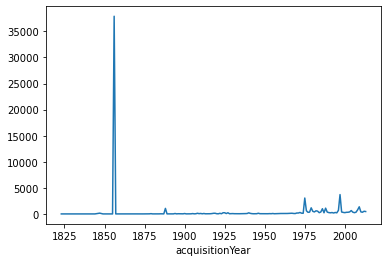

In [118]:
acquisition_years = df.groupby('acquisitionYear').size()
acquisition_years.plot()

<ipython-input-131-8c2c94430898>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


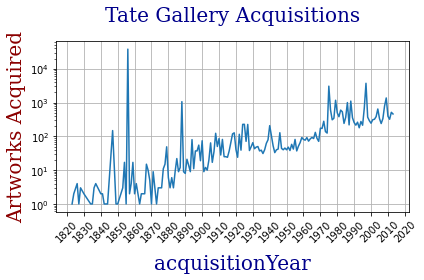

In [131]:
import matplotlib.pyplot as plt
from matplotlib import  rcParams
rcParams.update({'figure.autolayout': True, 'axes.titlepad': 20})

title_font = {
    'family': 'serif',
    'size': 20,
    'color': 'darkblue',
    'weight': 'normal',
}
labels_font = {
    'family': 'serif',
    'size': 20,
    'color': 'darkred',
    'weight': 'normal',
}

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xlabel('Acquisition Year', fontdict=title_font, labelpad=10)
subplot.set_ylabel('Artworks Acquired', fontdict=labels_font)
subplot.locator_params(nbins=40, axis='x')
subplot.set_title('Tate Gallery Acquisitions', fontdict=title_font)
acquisition_years.plot(ax=subplot, rot=45, logy=True, grid=True)
fig.show()

In [ ]:
fig.savefig('plot.png')
fig.savefig('plog.svg', format='svg')
# fig.savefig('plot.pdf', format='pdf')
# fig.savefig('plot.pdf', format='pdf', bbox_inches='tight')
# fig.savefig('plot.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5)
# fig.savefig('plot.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5, transparent=True)
# fig.savefig('plot.pdf', format='pdf', bbox_inches='tight', pad_inches=0.5, transparent=True, dpi=300)

# books to learn

+ Python for Data Analysis by Wes McKinney
+ Python Data Science Handbook by Jake VanderPlas
+ OPenintro Statistics